In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
#ignorar os avisos do python
warnings.filterwarnings('ignore')

# alterando o tamanho das figuras
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (16,9)

In [2]:
url = "https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip"
df = pd.read_csv(url, compression='zip', sep = ';')
df['datahora'] = pd.to_datetime(df['datahora'], format = "%Y-%m-%d")
df_sp = df.query("nome_munic == 'São Paulo'")

In [3]:
prophet = pd.DataFrame()
prophet['ds'] = df_sp['datahora']
prophet['y'] = df_sp['casos_novos']

In [4]:
#import Prophet
from fbprophet import Prophet

In [5]:
modelo = Prophet()

In [6]:
modelo.fit(prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
futuro = modelo.make_future_dataframe(periods=30)

In [8]:
previsao = modelo.predict(futuro)

In [9]:
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-119.052217,-833.589073,1557.118931,-119.052217,-119.052217,500.712817,500.712817,500.712817,500.712817,500.712817,500.712817,0.0,0.0,0.0,381.660600
1,2020-02-26,-101.733359,-810.964414,1612.739074,-101.733359,-101.733359,555.369016,555.369016,555.369016,555.369016,555.369016,555.369016,0.0,0.0,0.0,453.635657
2,2020-02-27,-84.414501,-669.675373,1864.121085,-84.414501,-84.414501,650.415890,650.415890,650.415890,650.415890,650.415890,650.415890,0.0,0.0,0.0,566.001389
3,2020-02-28,-67.095643,-935.204023,1461.405008,-67.095643,-67.095643,368.220574,368.220574,368.220574,368.220574,368.220574,368.220574,0.0,0.0,0.0,301.124931
4,2020-02-29,-49.776785,-1219.670073,1129.713896,-49.776785,-49.776785,30.668336,30.668336,30.668336,30.668336,30.668336,30.668336,0.0,0.0,0.0,-19.108449


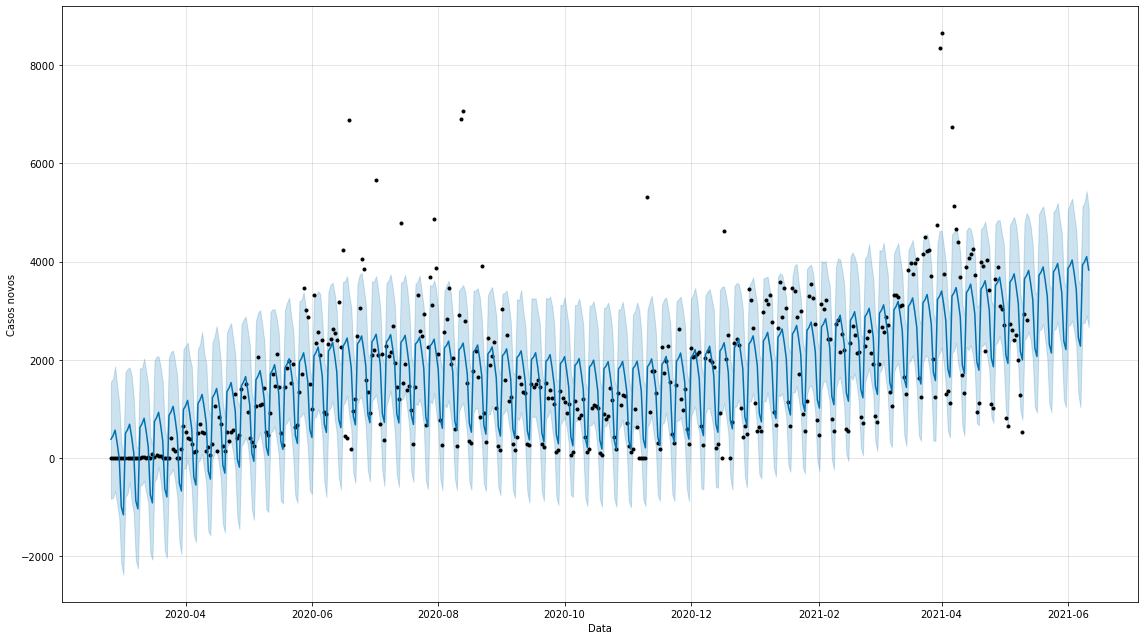

In [10]:
modelo.plot(previsao,xlabel = 'Data', ylabel = 'Casos novos', figsize=(16,9));

# Separação em dados de treino e dados de teste

In [11]:
df_sp.shape

(443, 26)

Serão utilizado os 400 primeiros dados para treinar o modelo e os ultimos dados para testá-lo

In [12]:
profeta = pd.DataFrame()
profeta['ds'] = df_sp['datahora'][:400]
profeta['y'] = df_sp['casos_novos'][:400]

In [13]:
modelo = Prophet()
modelo.fit(profeta)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
previsto = modelo.make_future_dataframe(periods=43)
previsto = modelo.predict(previsto)
previsto.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-149.825882,-752.031535,1440.424779,-149.825882,-149.825882,457.898870,457.898870,457.898870,457.898870,457.898870,457.898870,0.0,0.0,0.0,308.072988
1,2020-02-26,-131.885705,-731.296064,1453.028078,-131.885705,-131.885705,456.975129,456.975129,456.975129,456.975129,456.975129,456.975129,0.0,0.0,0.0,325.089424
2,2020-02-27,-113.945527,-582.105067,1602.350814,-113.945527,-113.945527,596.202571,596.202571,596.202571,596.202571,596.202571,596.202571,0.0,0.0,0.0,482.257043
3,2020-02-28,-96.005350,-794.332329,1298.397680,-96.005350,-96.005350,340.836568,340.836568,340.836568,340.836568,340.836568,340.836568,0.0,0.0,0.0,244.831218
4,2020-02-29,-78.065173,-1108.291357,1088.136229,-78.065173,-78.065173,59.096534,59.096534,59.096534,59.096534,59.096534,59.096534,0.0,0.0,0.0,-18.968639


In [15]:
df_teste = pd.DataFrame()
df_teste['ds'] = df_sp['datahora'][400:]
df_teste['y'] = df_sp['casos_novos'][400:]

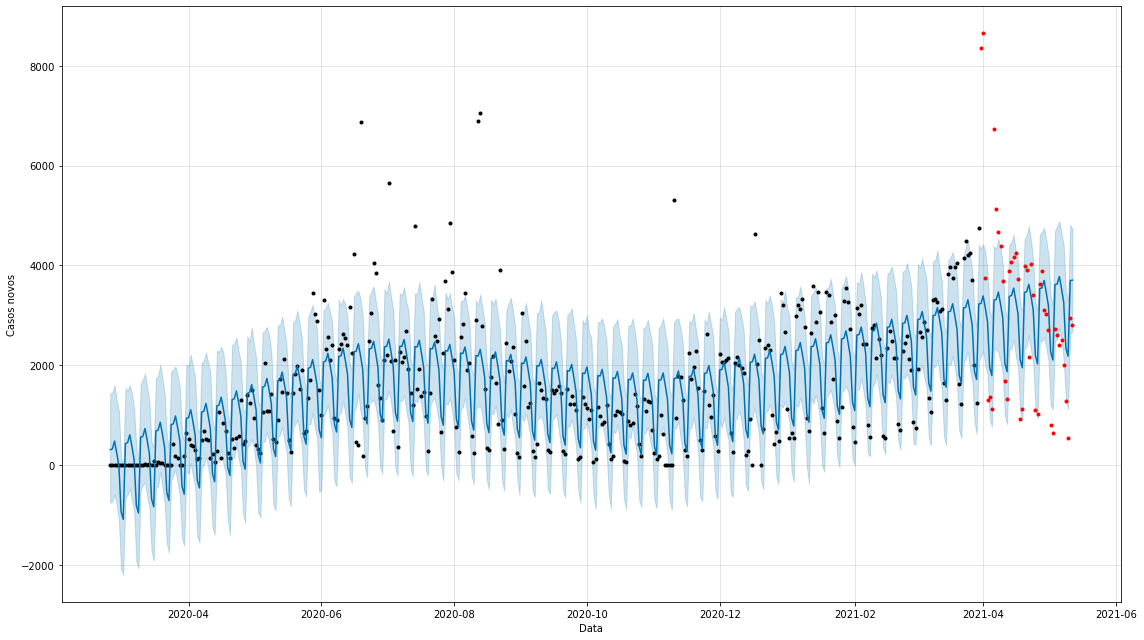

In [16]:
modelo.plot(previsto,xlabel = 'Data', ylabel = 'Casos novos', figsize=(16,9));
plt.plot(df_teste['ds'],df_teste['y'],'.r')

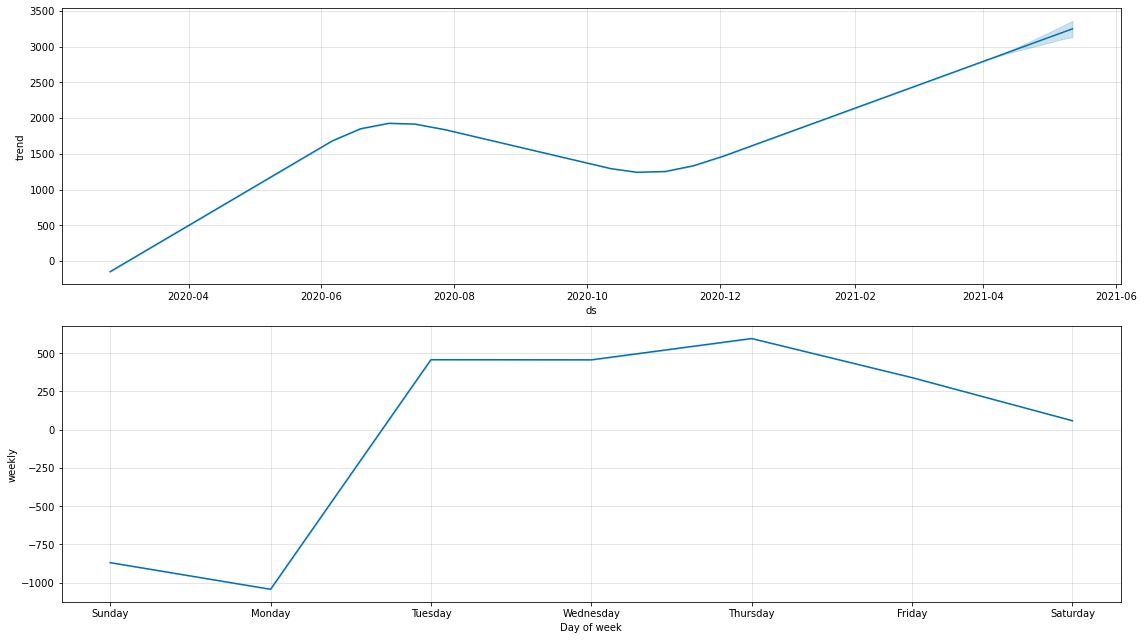

In [17]:
modelo.plot_components(previsto,figsize=(16,9));

# Desafio 08: Mudar os períodos de previsão.

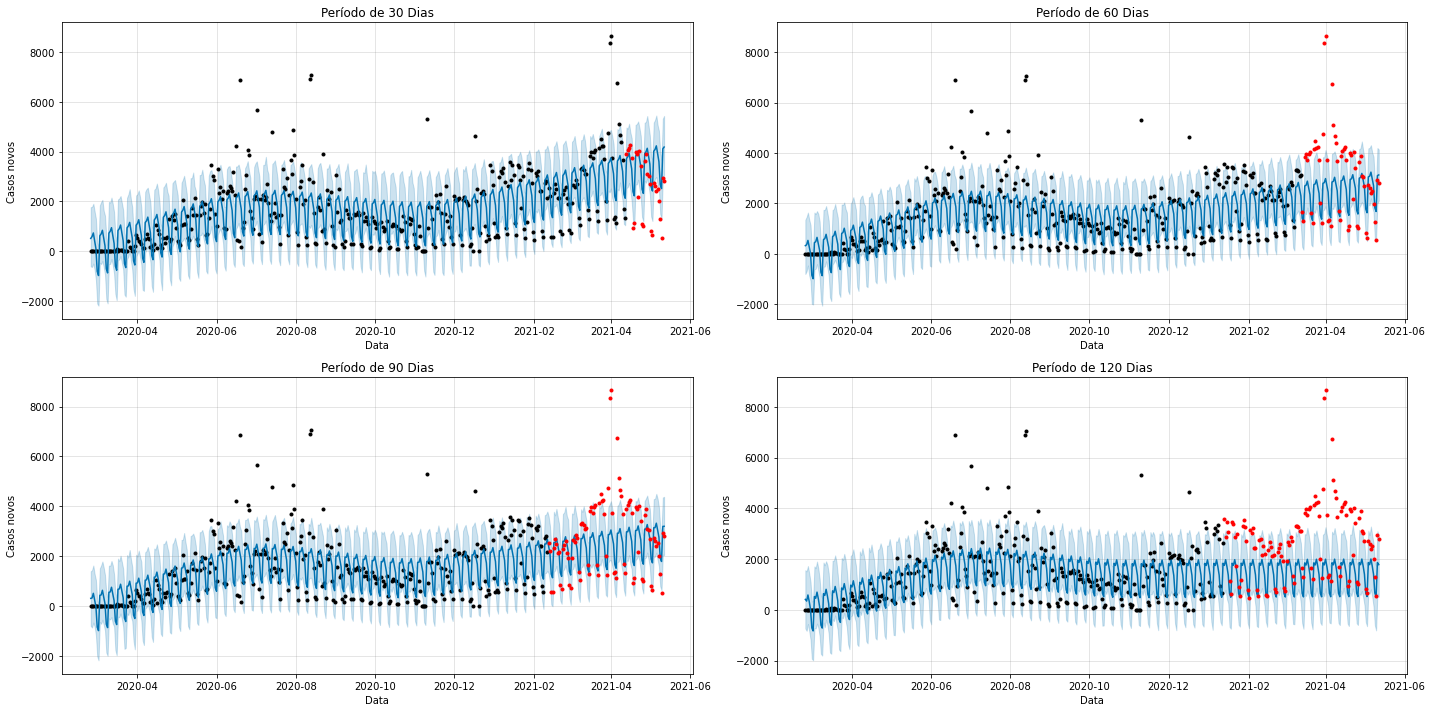

In [21]:
linha = 0
coluna = 0

fig, ax = plt.subplots(2,2, figsize=(20,10))

for dias in range(30,5*30,30):

    # Separando em dados de treino e dados de teste   
    profeta = pd.DataFrame()
    profeta['ds'] = df_sp['datahora'][:(df_sp.shape[0]-dias)]
    profeta['y'] = df_sp['casos_novos'][:(df_sp.shape[0]-dias)]

    # Criando o modelo
    modelo = Prophet(daily_seasonality = False, yearly_seasonality = False)
    modelo.fit(profeta)

    # Fazendo as previsões
    previsto = modelo.make_future_dataframe(periods=dias)
    previsto = modelo.predict(previsto)

    # Dataframe de teste para a validação do que foi previsto
    df_teste = pd.DataFrame()
    df_teste['ds'] = df_sp['datahora'][(df_sp.shape[0]-dias):]
    df_teste['y'] = df_sp['casos_novos'][(df_sp.shape[0]-dias):]

    # Plot's
    modelo.plot(previsto,xlabel = 'Data', ylabel = 'Casos novos', ax = ax[linha, coluna])
    ax[linha,coluna].plot(df_teste['ds'],df_teste['y'],'.r');
    ax[linha,coluna].set_title('Período de '+str(dias)+ ' Dias')

    # Atualizando a formatação das linhas e colunas
    if coluna == 1:
        coluna=0
        linha+=1
    else:
        coluna+=1

Mesmo aumentando a quantidade de dias de previsão o modelo apresentou um resultado muito bom para todos os casos

# Desafio 09: Explorar a documentação do Prophet e melhorar os gráficos.
https://peerj.com/preprints/3190/

https://facebook.github.io/prophet/docs/quick_start.html

https://nextjournal.com/fb-prophet/facebook-prophet-diagnostics

In [43]:
# https://facebook.github.io/prophet/docs/diagnostics.html
from prophet.diagnostics import cross_validation

profeta = pd.DataFrame()
profeta['ds'] = df_sp['datahora']
profeta['y'] = df_sp['casos_novos']

m = Prophet()
m.fit(profeta)

df_cv = cross_validation(m, initial='400 days', period='180 days', horizon = '30 days')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 1 forecasts with cutoffs between 2021-04-12 00:00:00 and 2021-04-12 00:00:00
100%|██████████| 1/1 [00:02<00:00,  2.51s/it]


In [44]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,5.115535e+04,226.175487,221.237764,0.054586,0.053377,0.056181,1.000000
1,4 days,1.781388e+05,422.064888,379.634619,0.090582,0.068361,0.095931,1.000000
2,5 days,2.105557e+05,458.863526,426.185109,0.105222,0.112280,0.111990,1.000000
3,6 days,9.034661e+05,950.508335,838.413145,0.610292,0.150008,0.386746,0.666667
4,7 days,1.169069e+06,1081.235038,991.420017,0.885173,0.974650,0.551123,0.666667


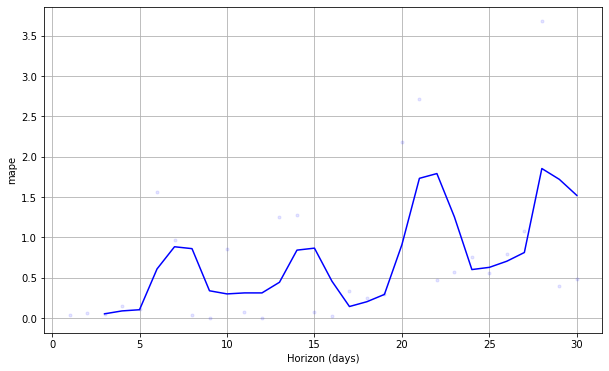

In [45]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

# Desafio 10: Fazer todo o processo de previsão para o número de casos acumulados

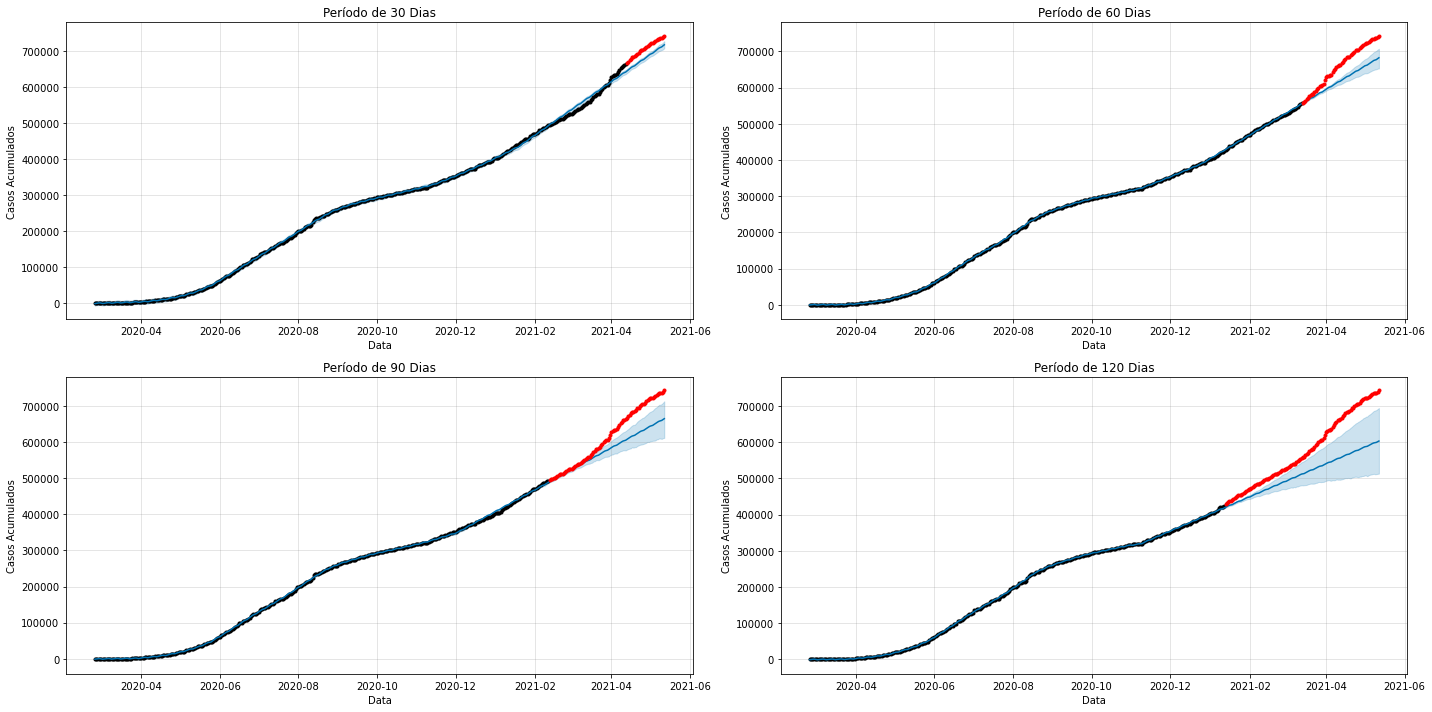

In [22]:
linha = 0
coluna = 0

fig, ax = plt.subplots(2,2, figsize=(20,10))

for dias in range(30,5*30,30):

    # Separando em dados de treino e dados de teste   
    profeta = pd.DataFrame()
    profeta['ds'] = df_sp['datahora'][:(df_sp.shape[0]-dias)]
    profeta['y'] = df_sp['casos'][:(df_sp.shape[0]-dias)]

    # Criando o modelo
    modelo = Prophet(daily_seasonality = False, yearly_seasonality = False)
    modelo.fit(profeta)

    # Fazendo as previsões
    previsto = modelo.make_future_dataframe(periods=dias)
    previsto = modelo.predict(previsto)

    # Dataframe de teste para a validação do que foi previsto
    df_teste = pd.DataFrame()
    df_teste['ds'] = df_sp['datahora'][(df_sp.shape[0]-dias):]
    df_teste['y'] = df_sp['casos'][(df_sp.shape[0]-dias):]

    # Plot's
    modelo.plot(previsto,xlabel = 'Data', ylabel = 'Casos Acumulados', ax = ax[linha, coluna])
    ax[linha,coluna].plot(df_teste['ds'],df_teste['y'],'.r');
    ax[linha,coluna].set_title('Período de '+str(dias)+ ' Dias')

    # Atualizando a formatação das linhas e colunas
    if coluna == 1:
        coluna=0
        linha+=1
    else:
        coluna+=1

Ainda que a incerteza aumentou o modelo conseguiu prever o número de casos acumulado com uma precisão bastante satisfatória